Trigger efficiency as a function of subleading DSA muon.

In [1]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend
from rootpy.plotting.shapes import Line

Welcome to JupyROOT 6.12/07


In [44]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/triggerDsa__TREE.root')
f = root_open(fn)

In [45]:
f.keys()

[Key('trig')]

In [46]:
t=f.trig
sorted(t.branchnames)

['DoubleL2Mu23NoVtx_2Cha',
 'DoubleL2Mu23NoVtx_2Cha_CosmicSeed',
 'DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched',
 'DoubleL2Mu23NoVtx_2Cha_NoL2Matched',
 'DoubleL2Mu25NoVtx_2Cha_CosmicSeed_Eta2p4',
 'DoubleL2Mu25NoVtx_2Cha_Eta2p4',
 'dsa1_eta',
 'dsa1_pt']

In [6]:
set_style(MyStyle())
canvas = Canvas(500, 400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


In [47]:
trigstr = '|'.join([
    'DoubleL2Mu23NoVtx_2Cha',
    'DoubleL2Mu23NoVtx_2Cha_CosmicSeed',
    'DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched',
    'DoubleL2Mu23NoVtx_2Cha_NoL2Matched',
])
pt_total = t.Draw('dsa1_pt>>pt_total(200,0,200)')
pt_passed = t.Draw('dsa1_pt>>pt_passed(200,0,200)', trigstr)

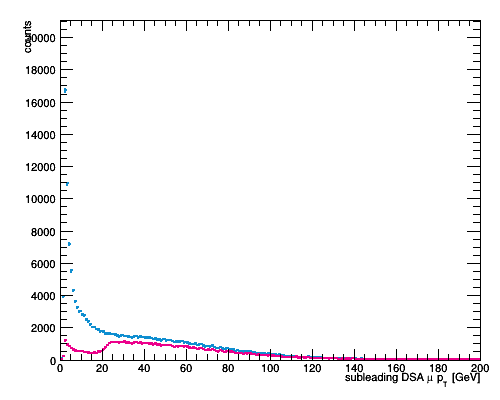

In [48]:
canvas.clear()

hs = [pt_total, pt_passed]
for i,h in enumerate(hs):
    h.color = sigCOLORS[i]
    h.linewidth=2
    h.markersize=0.5
draw(hs[:], pad=canvas, xtitle='subleading DSA #mu p_{T} [GeV]', ytitle='counts')
canvas.draw()

In [49]:
pteffi_g = Efficiency(pt_passed, pt_total).graph

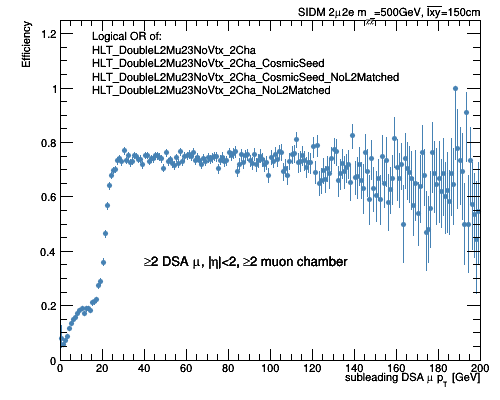

In [51]:
canvas.clear()

pteffi_g.drawstyle='APZ'
pteffi_g.markersize=0.5
pteffi_g.color='steelblue'
draw(pteffi_g, pad=canvas, xtitle='subleading DSA #mu p_{T} [GeV]', ytitle='Efficiency')

sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()


annot = ROOT.TLatex(40,0.36, '#geq2 DSA #mu, |#eta|<2, #geq2 muon chamber')

annot.Draw()
annot.SetTextSize(0.035)
annot.SetTextAlign(12)
annot.Draw()

annotation = ROOT.TPaveText(10, 0.95, 120, 1.2)
annotation.AddText('Logical OR of:')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched')
annotation.SetTextAlign(11)
annotation.SetTextSize(0.03)
annotation.SetFillColor(0)
annotation.SetBorderSize(0)
annotation.Draw()

canvas.draw()

In [52]:
canvas.save_as('imgs/trigger_subleadDsaPt__2mu2e.pdf')

INFO:ROOT.TCanvas.Print] pdf file imgs/trigger_subleadDsaPt__2mu2e.pdf has been created


In [53]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/triggerDsa_4mu__TREE.root')
f = root_open(fn)
t=f.trig

In [54]:
trigstr = '|'.join([
    'DoubleL2Mu23NoVtx_2Cha',
    'DoubleL2Mu23NoVtx_2Cha_CosmicSeed',
    'DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched',
    'DoubleL2Mu23NoVtx_2Cha_NoL2Matched',
])
pt_total = t.Draw('dsa1_pt>>pt_total(200,0,200)')
pt_passed = t.Draw('dsa1_pt>>pt_passed(200,0,200)', trigstr)

In [55]:
pteffi_g = Efficiency(pt_passed, pt_total).graph

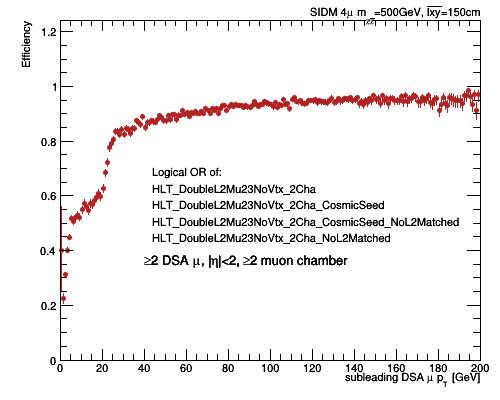

In [60]:
canvas.clear()

pteffi_g.drawstyle='APZ'
pteffi_g.markersize=0.5
pteffi_g.color='firebrick'
draw(pteffi_g, pad=canvas, xtitle='subleading DSA #mu p_{T} [GeV]', ytitle='Efficiency')

sampletag = LuminosityLabel('SIDM 4#mu m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()


annot = ROOT.TLatex(40,0.36, '#geq2 DSA #mu, |#eta|<2, #geq2 muon chamber')

annot.Draw()
annot.SetTextSize(0.035)
annot.SetTextAlign(12)
annot.Draw()

annotation = ROOT.TPaveText(40, 0.4, 120, 0.7)
annotation.AddText('Logical OR of:')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched')
annotation.AddText('HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched')
annotation.SetTextAlign(11)
annotation.SetTextSize(0.03)
annotation.SetFillColor(0)
annotation.SetBorderSize(0)
annotation.Draw()

canvas.draw()